kill .ipynb_checkpoint
     hyper_keys          hyper_item
0             K                1000
1             B                1024
2  split_method  bySample_bal_split
3             C                 0.1
4             E                   7
5            mu                 0.0


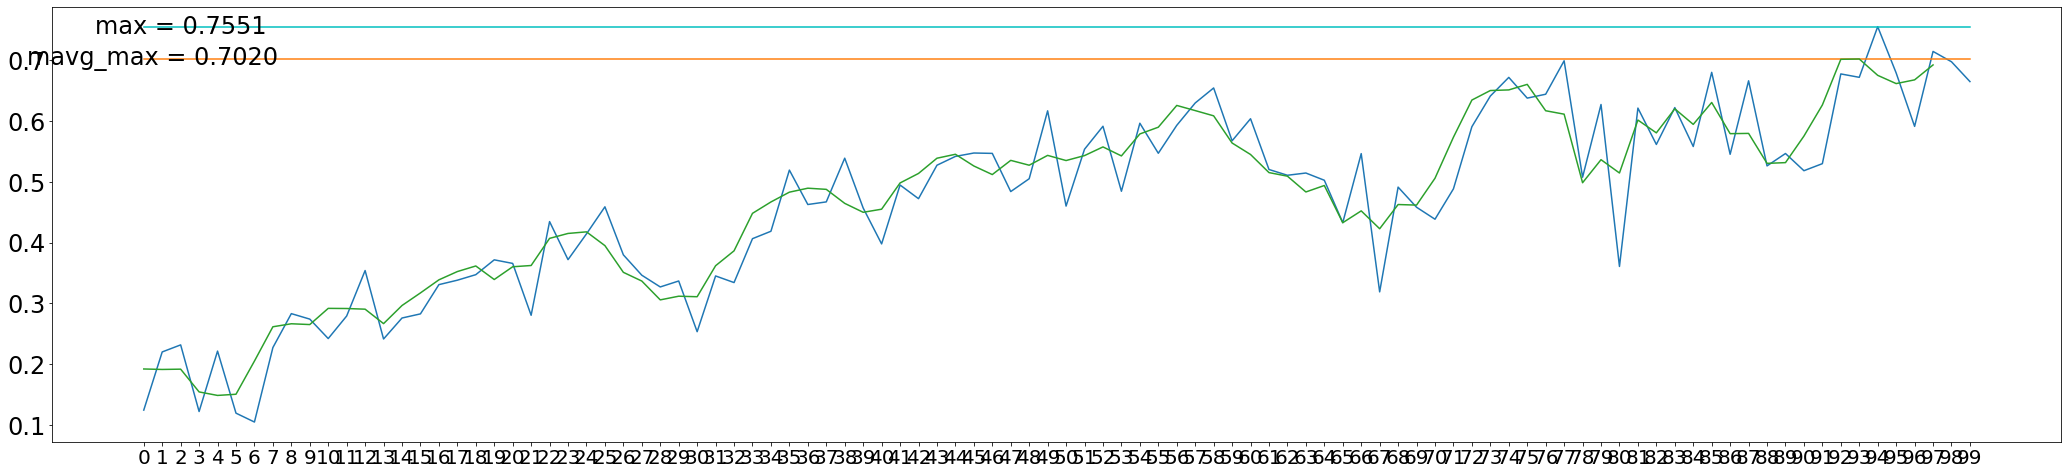

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import shutil




def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w


directory = './data'
if os.path.exists(directory+'/.ipynb_checkpoints'):
    print('kill .ipynb_checkpoint')
    shutil.rmtree(directory+'/.ipynb_checkpoints')
    
def plt_acctest(path = max([os.path.join(directory,d) for d in os.listdir(directory)], key=os.path.getmtime) ):
    plt.figure(figsize=(36,8))
    df = pd.read_csv(path)
    df.columns[1:]
    
    print(df.loc[:5, df.columns[1:]])
    plt.plot(list(df.index), df['Gmodel acc'])
    ax = [0, list(df.index)[-1]]
    a = np.max(df['Gmodel acc'].values)
    ay = [a,a]
    plt.plot(ax, ay, 'c')
    plt.text( 2, a, 'max = '+str(format(a, '.4f')), horizontalalignment='center',
          verticalalignment='center', fontsize = 24)

        
    w = 3 # windows size
    mavg = moving_average(df['Gmodel acc'], w)
    a = np.max(mavg)
    ay = [a,a]
    plt.plot(ax, ay)
    plt.plot(list(df.index)[:-(w-1)], mavg)
    plt.text( 0.5, a, 'mavg_max = '+str(format(a, '.4f')), horizontalalignment='center',
          verticalalignment='center', fontsize = 24)


        
    a = np.ceil(0.6*len(df))
#     plt.text( a,0.1, 'round = '+str(len(df)-1), horizontalalignment='center',
#           verticalalignment='center', fontsize = 30)
    plt.xticks(list(df.index), fontsize=20)
    plt.yticks(fontsize=24)
    plt.show()
    

plt_acctest()

## pivot table

In [7]:
import pandas as pd

In [8]:
data = 'grid_search_20210828-025645.csv'
grid_csv = pd.read_csv('grid_search/'+data, index_col=False)
# grid_csv.pop('Unnamed: 0')
grid_csv

,C,K,rounds,epochs,mu,df_loc
0,1.0,12,100,1,"[1.0, 0.0]",./data/acc_test_20210826-161646.csv
1,1.0,12,100,1,"[1.0, 0.0]",./data/acc_test_20210826-162136.csv
2,1.0,12,100,3,"[1.0, 0.0]",./data/acc_test_20210826-163248.csv
3,1.0,12,100,3,"[1.0, 0.0]",./data/acc_test_20210826-164357.csv
4,1.0,12,100,7,"[1.0, 0.0]",./data/acc_test_20210826-170736.csv
...,...,...,...,...,...,...
67,0.1,1000,100,1,"[1.0, 0.0]",./data/acc_test_20210828-011148.csv
68,0.1,1000,100,3,"[1.0, 0.0]",./data/acc_test_20210828-013250.csv
69,0.1,1000,100,3,"[1.0, 0.0]",./data/acc_test_20210828-015350.csv
70,0.1,1000,100,7,"[1.0, 0.0]",./data/acc_test_20210828-022520.csv


In [9]:
lis = []
for sample in range(len(grid_csv)):
    data = grid_csv.loc[sample,:]
    dic = data.to_dict()

    df = pd.read_csv(dic['df_loc'], index_col=False)
    _ = set(df.dropna()['hyper_keys'])-set(dic.keys())

    for i in _:
        dic[i] = df[df['hyper_keys'] == i]['hyper_item'].to_numpy()[0]

    dic['maxACC'] = format(max(df['Gmodel acc']), '.4f')


    a = max(moving_average(df['Gmodel acc'], 3))

    dic['MA_maxACC'] = format(a, '.4f')

    lis.append(dic)

df = pd.DataFrame(lis)
a = list(df.columns)
(lambda col_lis, col: a.append(a.pop(a.index(col))))(a,'df_loc')
df = df[a]
df.head(3)

,C,K,rounds,epochs,mu,E,split_method,B,maxACC,MA_maxACC,df_loc
0,1.0,12,100,1,"[1.0, 0.0]",1,bySample_bal_split,1024,0.8718,0.8416,./data/acc_test_20210826-161646.csv
1,1.0,12,100,1,"[1.0, 0.0]",1,bySample_bal_split,1024,0.8694,0.8550,./data/acc_test_20210826-162136.csv
2,1.0,12,100,3,"[1.0, 0.0]",3,bySample_bal_split,1024,0.9271,0.9068,./data/acc_test_20210826-163248.csv


In [10]:
a = df.loc[:, ['C','K','E', 'maxACC','MA_maxACC']]
a.dtypes.index
for i in a.dtypes.index:
    if a.dtypes[i] == 'object':
        a.loc[:,i] = a.loc[:,i].map(lambda x: float(x))

a = pd.pivot_table(a, values='maxACC', index=['C', 'E'],
                    columns=['K'])
a.sort_values(by = 'C', ascending=False)

K           12       50       100      1000
C   E                                      
1.0 1.0  0.87060  0.71100  0.58875  0.62300
    3.0  0.89955  0.73505  0.70965  0.60395
    7.0  0.89860  0.77770  0.73350  0.76510
0.5 1.0  0.83270  0.68625  0.60350  0.62240
    3.0  0.86425  0.79365  0.71290  0.65840
    7.0  0.89970  0.82820  0.80550  0.79815
0.1 1.0  0.70435  0.64560  0.61715  0.61695
    3.0  0.60895  0.72275  0.63955  0.59130
    7.0  0.32080  0.69890  0.68480  0.76090

In [11]:
a = df.loc[:, ['C','K','E', 'maxACC','MA_maxACC']]
a.dtypes.index
for i in a.dtypes.index:
    if a.dtypes[i] == 'object':
        a.loc[:,i] = a.loc[:,i].map(lambda x: float(x))

a = pd.pivot_table(a, values='MA_maxACC', index=['C', 'E'],
                    columns=['K'])
a.sort_values(by = 'C', ascending=False)

K           12       50       100      1000
C   E                                      
1.0 1.0  0.84830  0.70110  0.58700  0.62100
    3.0  0.87910  0.71405  0.70040  0.59885
    7.0  0.87275  0.76055  0.71675  0.75880
0.5 1.0  0.79980  0.63245  0.58990  0.61945
    3.0  0.80960  0.75195  0.69030  0.63995
    7.0  0.77215  0.76010  0.78690  0.78195
0.1 1.0  0.60720  0.60615  0.57105  0.61350
    3.0  0.50160  0.64320  0.58790  0.57780
    7.0  0.27125  0.59035  0.60725  0.70995